In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#### Import Data

In [2]:
df=pd.read_csv('loan_approval_dataset.csv')

In [3]:
df

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

In [4]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
df.shape

(4269, 13)

#### Clean the data with removing missing values and outlier detection

In [6]:
# Lebel Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df:
    df[col]=le.fit_transform(df[col])

In [9]:
df.describe()

loan_id   no_of_dependents    education   self_employed  \
count  4269.000000        4269.000000  4269.000000     4269.000000   
mean   2134.000000           2.498712     0.497775        0.503631   
std    1232.498479           1.695910     0.500054        0.500045   
min       0.000000           0.000000     0.000000        0.000000   
25%    1067.000000           1.000000     0.000000        0.000000   
50%    2134.000000           3.000000     0.000000        1.000000   
75%    3201.000000           4.000000     1.000000        1.000000   
max    4268.000000           5.000000     1.000000        1.000000   

        income_annum   loan_amount    loan_term   cibil_score  \
count    4269.000000   4269.000000  4269.000000   4269.000000   
mean       48.591239    148.290466     4.450223    299.936051   
std        28.068398     90.324568     2.854594    172.430401   
min         0.000000      0.000000     0.000000      0.000000   
25%        25.000000     74.000000     2.000000    153.000000   
50%        49.000000    142.000000     4.000000    300.000000   
75%        73.000000    212.000000     7.000000    448.000000   
max        97.000000    377.000000     9.000000    600.000000   

        residential_assets_value   commercial_assets_value  \
count                4269.000000               4269.000000   
mean                   75.667838                 49.712345   
std                    64.864539                 43.831312   
min                     0.000000                  0.000000   
25%                    23.000000                 13.000000   
50%                    57.000000                 37.000000   
75%                   114.000000                 76.000000   
max                   277.000000                187.000000   

        luxury_assets_value   bank_asset_value   loan_status  
count           4269.000000        4269.000000   4269.000000  
mean             148.222769          49.749356      0.377840  
std               90.938931          32.456249      0.484904  
min                0.000000           0.000000      0.000000  
25%               72.000000          23.000000      0.000000  
50%              143.000000          46.000000      0.000000  
75%              214.000000          71.000000      1.000000  
max              378.000000         145.000000      1.000000

In [10]:
# Remove leading and trailing spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True) 

In [11]:
# separate Input Output data
x=df.drop('loan_status',axis=1)
y=df['loan_status']

In [12]:
x.info

<bound method DataFrame.info of       loan_id  no_of_dependents  education  self_employed  income_annum  \
0           0                 2          0              0            94   
1           1                 0          1              1            39   
2           2                 3          0              0            89   
3           3                 3          0              0            80   
4           4                 5          1              1            96   
...       ...               ...        ...            ...           ...   
4264     4264                 5          0              1             8   
4265     4265                 0          1              1            31   
4266     4266                 2          1              0            63   
4267     4267                 1          1              0            39   
4268     4268                 1          0              0            90   

      loan_amount  loan_term  cibil_score  residential_assets_value

In [13]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4269 entries, 0 to 4268
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
4269 non-null   int32
dtypes: int32(1)
memory usage: 16.8 KB


In [14]:
x.isnull().sum()
x.dropna()
y.isnull().sum()
y.dropna()

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int32

In [15]:
# Outlier Detection And Removal
from sklearn.ensemble import IsolationForest
iso=IsolationForest(random_state=0,contamination=0.05)
clean=iso.fit_predict(x,y)

C:\ProgramData\anacondaa\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [16]:
x=x[clean==1]
y=y[clean==1]

In [17]:
x.shape

(4055, 12)

#### Use different graphs to understand the data

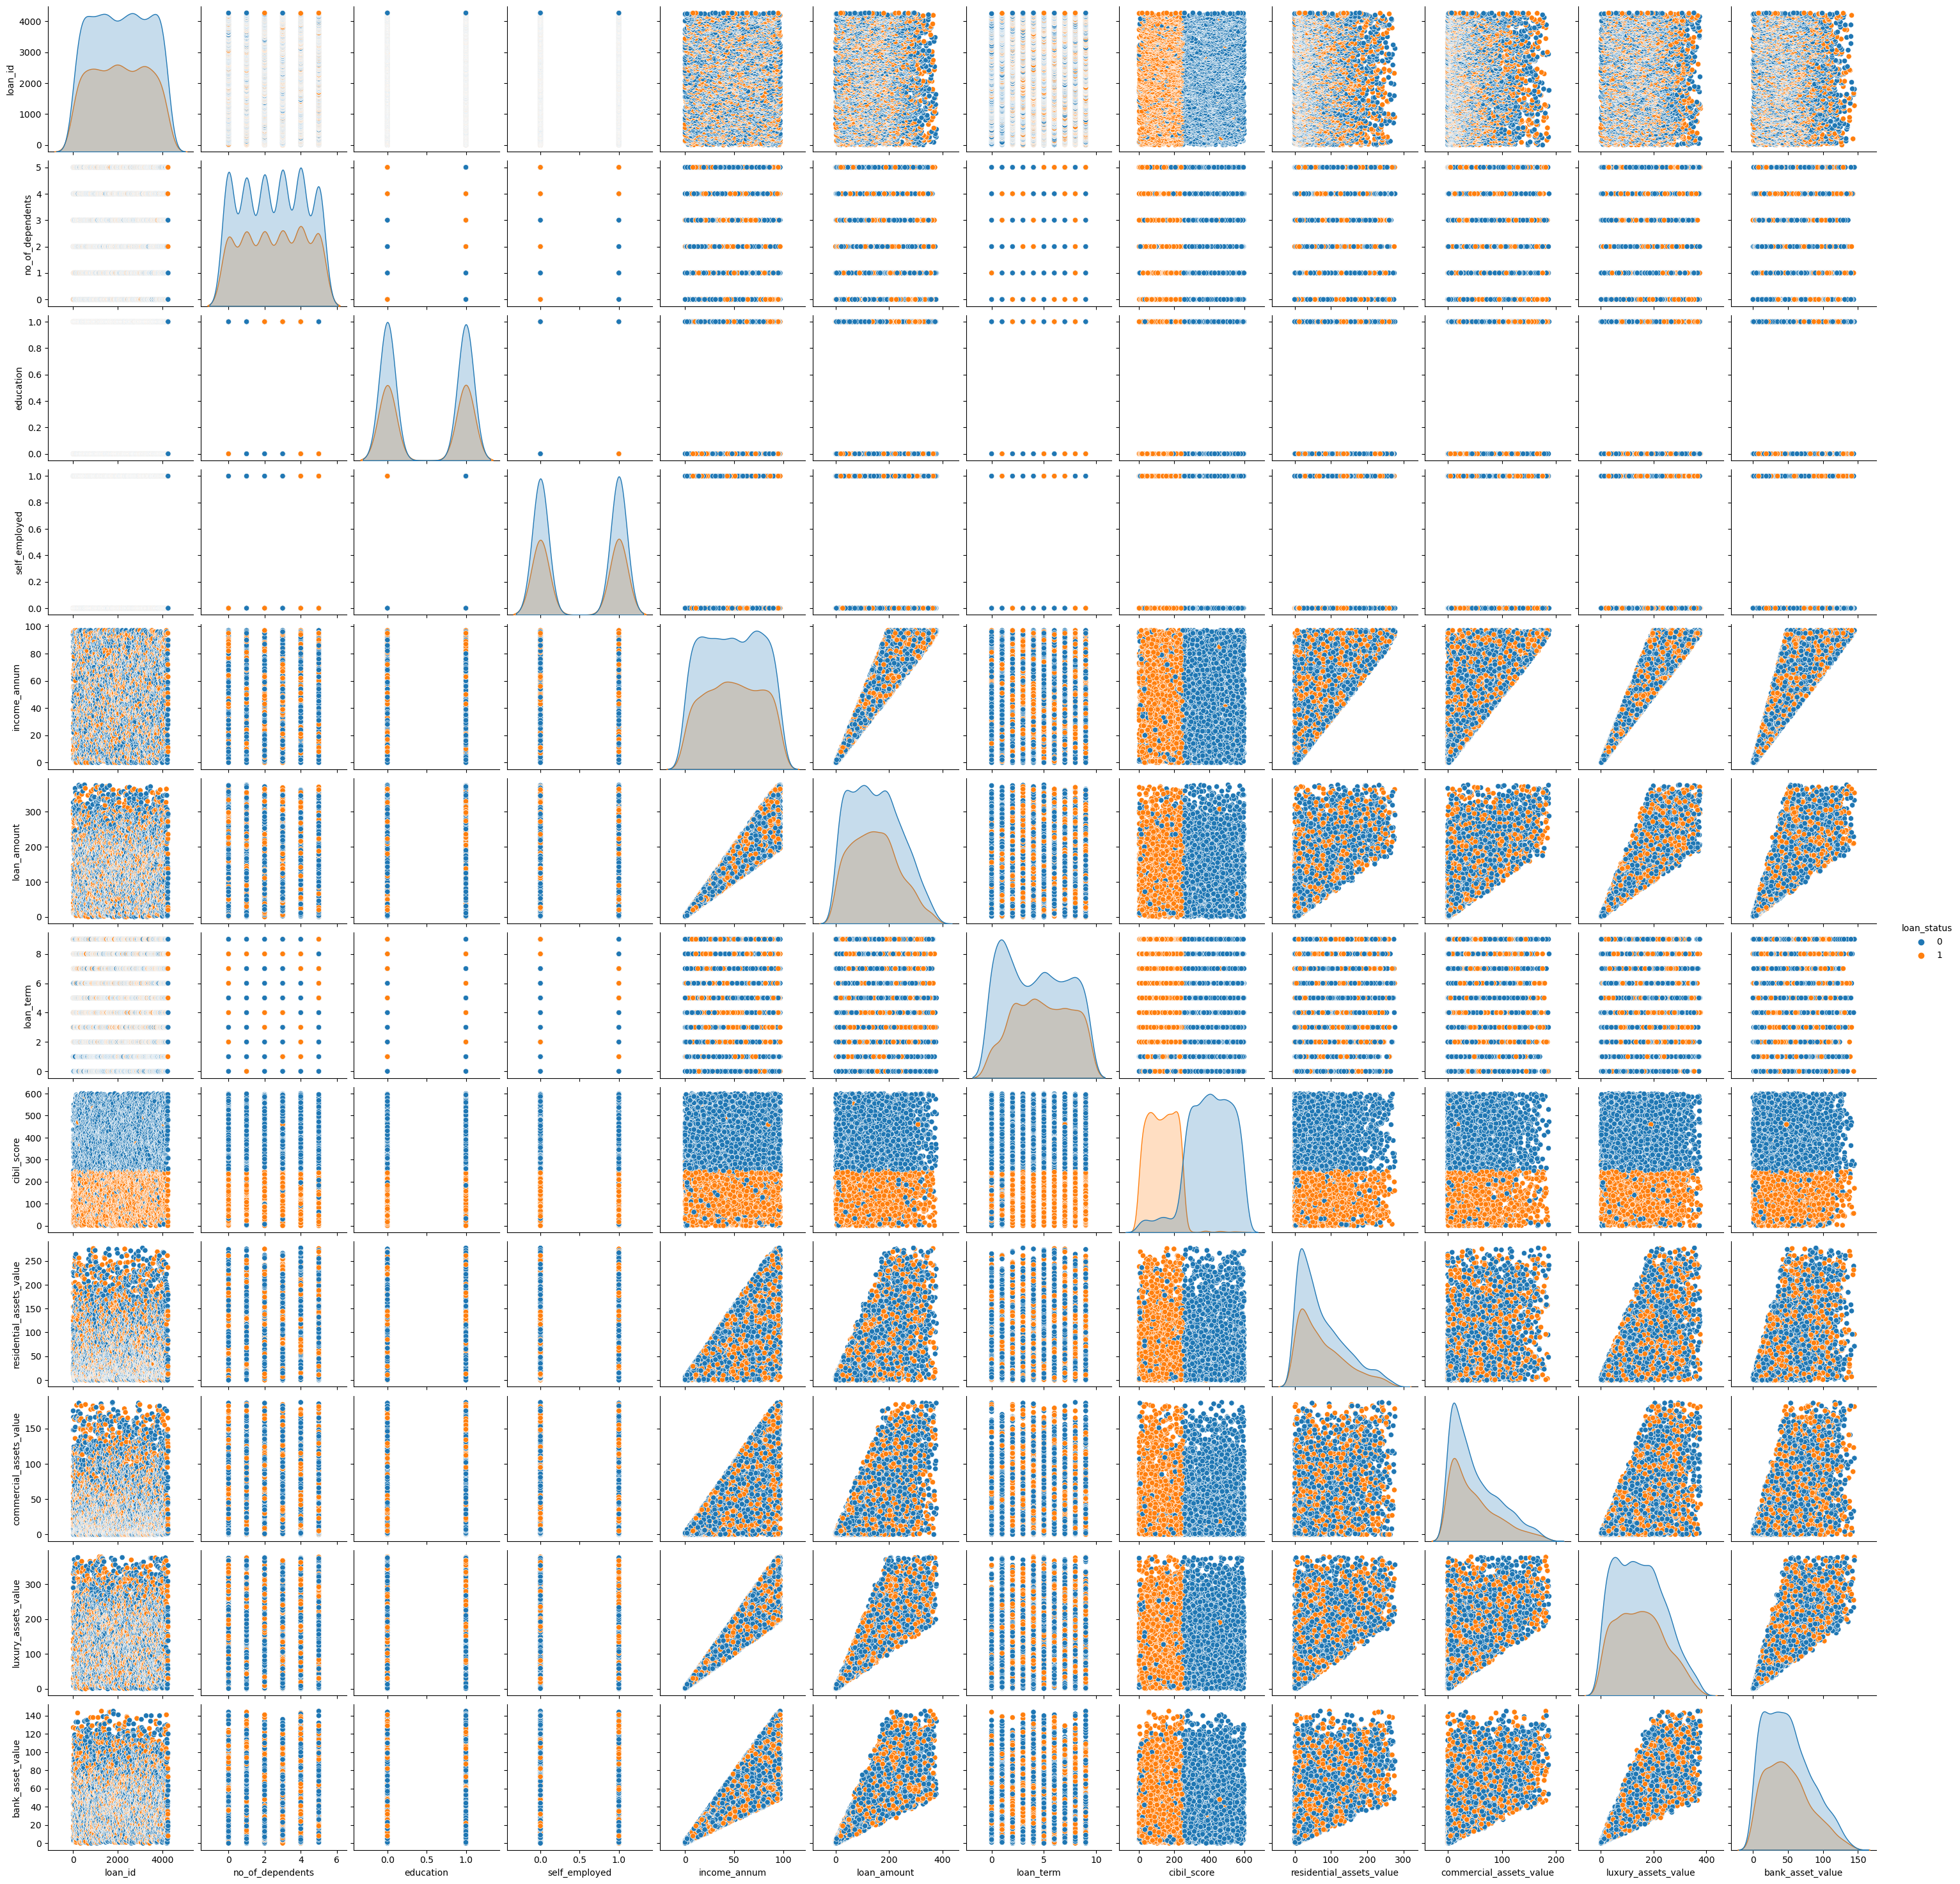

In [18]:
sns.pairplot(df,hue='loan_status',palette='tab10')

<Axes: xlabel='loan_status', ylabel='count'>

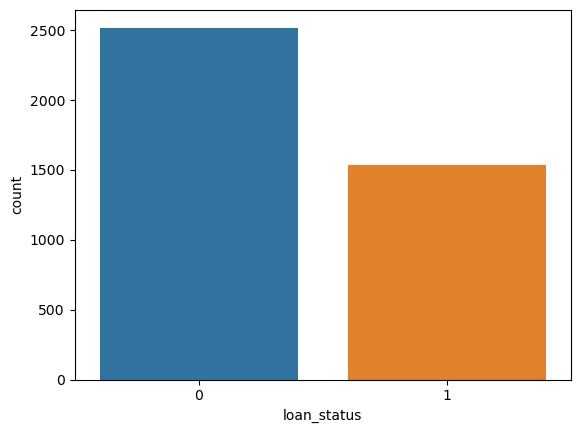

In [19]:
sns.countplot(x=y)

####  encoding or scaling 

In [20]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_res,y_res=ros.fit_resample(x,y)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [22]:
x_scaled

array([[0.00000000e+00, 4.00000000e-01, 0.00000000e+00, ...,
        9.83146067e-01, 5.95744681e-01, 5.55555556e-01],
       [2.34356691e-04, 0.00000000e+00, 1.00000000e+00, ...,
        1.23595506e-01, 2.26063830e-01, 2.29166667e-01],
       [7.03070073e-04, 6.00000000e-01, 0.00000000e+00, ...,
        1.85393258e-01, 6.11702128e-01, 5.48611111e-01],
       ...,
       [9.99531287e-01, 0.00000000e+00, 1.00000000e+00, ...,
        1.62921348e-01, 2.84574468e-01, 1.31944444e-01],
       [9.99765643e-01, 4.00000000e-01, 1.00000000e+00, ...,
        6.96629213e-01, 4.73404255e-01, 5.06944444e-01],
       [1.00000000e+00, 2.00000000e-01, 1.00000000e+00, ...,
        3.93258427e-02, 3.67021277e-01, 4.02777778e-01]])

#### Check the accuracy of different algorithms

In [24]:
#Checking Accuracy

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=0,stratify=y)

In [25]:
x_train.shape

(3041, 12)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [27]:
clf_log=LogisticRegression(random_state=0)
clf_dt=DecisionTreeClassifier(random_state=0)
clf_knn=KNeighborsClassifier(n_neighbors=5)
clf_nb=GaussianNB()
clf_svm=SVC(kernel='rbf',random_state=0)
clf_rf=RandomForestClassifier(random_state=0)

In [28]:
clf_log.fit(x_train,y_train)
clf_dt.fit(x_train,y_train)
clf_knn.fit(x_train,y_train)
clf_nb.fit(x_train,y_train)
clf_svm.fit(x_train,y_train)
clf_rf.fit(x_train,y_train);

In [29]:
y_pred_log=clf_log.predict(x_test)
y_pred_dt=clf_dt.predict(x_test)
y_pred_knn=clf_knn.predict(x_test)
y_pred_nb=clf_nb.predict(x_test)
y_pred_svm=clf_svm.predict(x_test)
y_pred_rf=clf_rf.predict(x_test)

In [ ]:
print('LogR',accuracy_score(y_test,y_pred_log))
print('Dt',accuracy_score(y_test,y_pred_dt))
print('KNN:',accuracy_score(y_test,y_pred_knn))
print('NB',accuracy_score(y_test,y_pred_nb))
print('SVM',accuracy_score(y_test,y_pred_svm))
print('RFR',accuracy_score(y_test,y_pred_rf))

#### Apply hyperparameter tuning for parameter decision

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [32]:
grid= GridSearchCV(estimator=clf_rf,param_grid=param_grid,cv=5,n_jobs=-1)

In [33]:
grid.fit(x_train,y_train)

C:\ProgramData\anacondaa\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [35]:
y_pred_grid=grid.predict(x_test)
accuracy_score(y_test,y_pred_grid)

0.9812623274161736